In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn
from sklearn.preprocessing import OneHotEncoder

X, y = mglearn.datasets.make_wave(n_samples = 100)
print(X.shape)
print(y.shape)
line = np.linspace(-3,3, 1000, endpoint = False).reshape(-1,1)
print(line.shape)

bins = np.linspace(-3, 3, 11)
print(f"bins :{bins}")
which_bin = np.digitize(X, bins = bins)
print("\nData points:\n", X[:5])
print("\nBin membersship for data points:\n", which_bin[:5])

encoder = OneHotEncoder(sparse = False)
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print(f"X_binned.shape: {X_binned.shape}")

line_binned = encoder.transform(np.digitize(line, bins = bins))

(100, 1)
(100,)
(1000, 1)
bins :[-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]

Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membersship for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


[[-0.75275929  0.          0.         ...  0.          0.
   0.        ]
 [ 2.70428584  0.          0.         ...  0.          0.
   1.        ]
 [ 1.39196365  0.          0.         ...  1.          0.
   0.        ]
 ...
 [-0.43475389  0.          0.         ...  0.          0.
   0.        ]
 [-2.84748524  1.          0.         ...  0.          0.
   0.        ]
 [-2.35265144  0.          1.         ...  0.          0.
   0.        ]]
(100, 11)


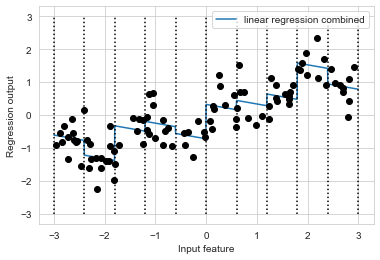

In [3]:
# この例では、モデルは個々のビンに対してオフセットと傾きを学習する。傾きは下向きで全てのビンで共有されているので、あまり役には立たない
from sklearn.linear_model import LinearRegression

X_combined = np.hstack([X, X_binned])
print(X_combined)
print(X_combined.shape)

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = "linear regression combined")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ":", c = "k")

plt.legend(loc = "best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:,0], y, "o", c = "k")

(100, 20)


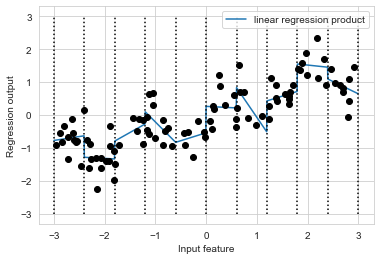

In [4]:
# それぞれのビンごとに傾きがあることを実現するには、
# データポイントがどのビンに入っているかを示す特徴量とx軸のどこにあるかを示す交互作用もしくは積を、特徴量として加えればよい
# 積の特徴量は、個々のビンにｘ軸の特徴量をそれぞれコピーしたと考えることもできる
# 図からわかるように、個々のビンがそれぞれオフセットと傾きを持つようになっている
# ビニングは、連続特徴量を拡張する方法の一つである

X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label = "linear regression product")

for bin in bins:
    plt.plot([bin, bin], [-3,3], ":", c = "k")

plt.plot(X[:,0], y, "o", c = "k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")

(100, 1)
(100, 10)
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]
Polynomial feature names: 
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0

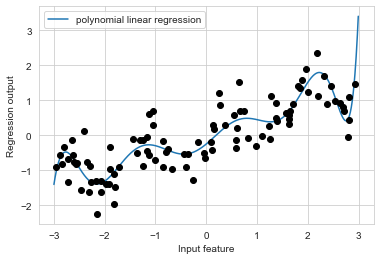

In [5]:
# 連続特徴量を拡張するもう一つの方法はもとの特徴量の多項式を使うことである
# 多項式特徴量を線形回帰モデルと組み合わせると、古典的な多項式回帰モデルになる
# しかし、高次の多項式は、境界近辺やデータが少ない領域で極端な振る舞いを示す傾向にある
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias = False)
poly.fit(X)
X_poly = poly.transform(X)
print(X.shape)
print(X_poly.shape)
print(X[:5])
print(X_poly[:5])
print(f"Polynomial feature names: \n{poly.get_feature_names()}")

reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = "polynomial linear regression")
plt.plot(X[:,0], y, "o", c = "k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")

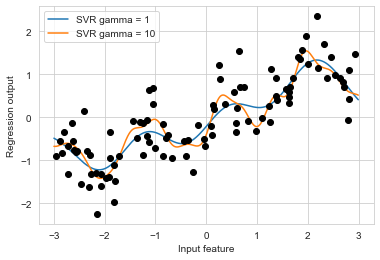

In [6]:
# 複雑なモデル（カーネル法を用いたSVM）を用いると、特徴量に対して明示的な変換を行わなくても、多項式回帰と同じように複雑な予測をすることができる
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma = gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label = f"SVR gamma = {gamma}")

plt.plot(X[:,0],y,"o", c = "k")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc = "best")

In [7]:
# bostonデータには13しか特徴量がなかったが、これを105の交互作用特徴量にまで拡張した
# これらの新しい特徴量は、もとの特徴量から2つの特徴量のすべての組合せと、もとの特徴量の2乗である
# ここでdegree=2と指定しているのは、もとの特徴量2つの積まで考慮するという意味である
# 入力特徴量と出力特徴量の正確な関係はget_feature_namesメソッドでわかる。最初の特徴量は定数特徴量で、ここでは"1"と呼ばれている
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(boston.data.shape)
print(boston.feature_names)

poly = PolynomialFeatures(degree = 2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f"X_train.shape: {X_train.shape}")
print(f"X_train_poly.shape: {X_train_poly.shape}")
print(f"Polynomial feature names:\n{poly.get_feature_names()}")

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)
Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11

In [8]:
# 交互作用特徴量と多項式特徴量はRidgeの性能を明らかに押し上げている
# 一方で、追加の特徴量がなくてもランダムフォレストの性能はRidgeを上回る。交互作用特徴量と多項式特徴量を入れると、僅かに性能が下がっている
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

print("Ridge")
ridge = Ridge().fit(X_train_scaled, y_train)
print(f"Score without interactions: {ridge.score(X_test_scaled, y_test):.3f}")
ridge = Ridge().fit(X_train_poly, y_train)
print(f"Score with interactions: {ridge.score(X_test_poly, y_test):.3f}")

print("")
print("Random Forest")
rf = RandomForestRegressor(n_estimators = 100).fit(X_train_scaled, y_train)
print(f"Score without interactions: {rf.score(X_test_scaled, y_test):.3f}")
rf = RandomForestRegressor(n_estimators = 100).fit(X_train_poly, y_train)
print(f"Score with interactions: {rf.score(X_test_poly, y_test):.3f}")

Ridge
Score without interactions: 0.621
Score with interactions: 0.753

Random Forest
Score without interactions: 0.802
Score with interactions: 0.781
